In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
pd.set_option('display.max_columns', 200)

In [125]:
path = 'C:/Users/wjssm/Desktop/kaggle/competition/Elo_Merchant_Category_Recommendation/data/'
merchant = pd.read_csv(path+'merchants.csv') #key : merchant_id

In [126]:
transaction = pd.read_pickle(path + 'merged_transaction.pkl')
transaction.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_00007093c1,244,N,2,C,705,M_ID_69423b34e4,-12,0.037176,2017-02-14 14:00:43,3.0,2,33
1,Y,C_ID_00007093c1,244,N,1,B,705,M_ID_a33355a1b7,-12,-0.467415,2017-02-14 15:47:45,3.0,2,33
2,Y,C_ID_00007093c1,244,N,1,B,307,M_ID_9400cf2342,-12,-0.572600,2017-02-16 15:37:58,3.0,2,19
3,Y,C_ID_00007093c1,244,N,3,C,705,M_ID_a33355a1b7,-12,-0.331575,2017-02-20 12:19:01,3.0,2,33
4,Y,C_ID_00007093c1,244,N,1,B,307,M_ID_9400cf2342,-11,-0.483944,2017-03-03 00:24:15,3.0,2,19


In [18]:
transaction.isnull().sum()

authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3               234081
merchant_category_id          0
merchant_id              164697
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2764609
state_id                      0
subsector_id                  0
dtype: int64

In [103]:
len(transaction.merchant_id.unique())

334634

In [5]:
#transaction 데이터에 merchant_id 개수가 더 많음
len(set(transaction.merchant_id) - set(merchant.merchant_id))

164697

In [6]:
len(set(merchant.merchant_id) - set(transaction.merchant_id))

0

In [3]:
merchant.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [13]:
#왜 다를까?ㅎㅎ
print('merchant 데이터 개수 : ' , len(merchant))
print('merchant merchant_id 개수 : ' , len(merchant.merchant_id.unique()))

merchant 데이터 개수 :  334696
merchant merchant_id 개수 :  334633


In [7]:
merchant.columns

Index(['merchant_id', 'merchant_group_id', 'merchant_category_id',
       'subsector_id', 'numerical_1', 'numerical_2', 'category_1',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
       'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',
       'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12',
       'category_4', 'city_id', 'state_id', 'category_2'],
      dtype='object')

In [5]:
merchant.most_recent_sales_range.value_counts()

E    177104
D    117475
C     34075
B      5037
A      1005
Name: most_recent_sales_range, dtype: int64

In [6]:
merchant.most_recent_purchases_range.value_counts()

E    175309
D    119187
C     34144
B      5046
A      1010
Name: most_recent_purchases_range, dtype: int64

In [7]:
merchant.category_1.value_counts()

N    327657
Y      7039
Name: category_1, dtype: int64

In [22]:
merchant.columns

Index(['merchant_id', 'merchant_group_id', 'merchant_category_id',
       'subsector_id', 'numerical_1', 'numerical_2', 'category_1',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
       'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',
       'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12',
       'category_4', 'city_id', 'state_id', 'category_2'],
      dtype='object')

## transaction 에 있는 city_id, merchant_id, state_id, subsector_id 는 card_id기준의 정보인가? -> merchant기준인 것 같음
## merchant에 있는 id정보는 merchant의 정보인가?

## 그러면 merchant_id가 같으면 -> merchant_category_id,city_id, state_id,subsector_id,merchant_group_id,category_2 같아야 됨

In [64]:
transaction.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_00007093c1,244,N,2,C,705,M_ID_69423b34e4,-12,0.037176,2017-02-14 14:00:43,3.0,2,33
1,Y,C_ID_00007093c1,244,N,1,B,705,M_ID_a33355a1b7,-12,-0.467415,2017-02-14 15:47:45,3.0,2,33
2,Y,C_ID_00007093c1,244,N,1,B,307,M_ID_9400cf2342,-12,-0.572600,2017-02-16 15:37:58,3.0,2,19
3,Y,C_ID_00007093c1,244,N,3,C,705,M_ID_a33355a1b7,-12,-0.331575,2017-02-20 12:19:01,3.0,2,33
4,Y,C_ID_00007093c1,244,N,1,B,307,M_ID_9400cf2342,-11,-0.483944,2017-03-03 00:24:15,3.0,2,19


In [70]:
#다 바꿀까? 하다가 어차피 mode로 사용하니까 냅둔다..
print('같은 행의 개수 :',sum(transaction.loc[transaction.merchant_id == 'M_ID_69423b34e4',transaction.columns.str.endswith('id') | 
                                                                transaction.columns.str.endswith('category_2')].duplicated()) )
print('데이터의 개수 : ' ,len(transaction.loc[transaction.merchant_id == 'M_ID_69423b34e4',:])-1)

같은 행의 개수 : 3332
데이터의 개수 :  4579


In [ ]:
#타협해서 merchant_multi는 몇 개 안 되니까 다 바꾸려다가 안 함 개뻘짓..

In [87]:
merchant_multi.merchant_id.unique()

array(['M_ID_c0b712e11a', 'M_ID_0039220eb3', 'M_ID_bd49e37dda',
       'M_ID_ef233cff26', 'M_ID_dbbf07ebf0', 'M_ID_0c4018d3a0',
       'M_ID_c470fbcfb9', 'M_ID_508ecbdcde', 'M_ID_0b8ed0c2b0',
       'M_ID_49b779bc8a', 'M_ID_8951e22556', 'M_ID_30340088f2',
       'M_ID_654509ddbc', 'M_ID_6017075769', 'M_ID_645a6af169',
       'M_ID_32d73b8ecf', 'M_ID_a8767b29ef', 'M_ID_a55beb9d9a',
       'M_ID_0a00fa9e8a', 'M_ID_26d4fadb60', 'M_ID_07a5671b4c',
       'M_ID_b794b9d9e8', 'M_ID_fea38c640b', 'M_ID_28c2aace87',
       'M_ID_49daf8a838', 'M_ID_ae9fe1605a', 'M_ID_00a6ca8a8a',
       'M_ID_1ceca881f0', 'M_ID_9b0ef314cf', 'M_ID_7483dde87d',
       'M_ID_ebbdb42da6', 'M_ID_7251df88ad', 'M_ID_57e97f6546',
       'M_ID_6c144405a0', 'M_ID_c2b9ac2ea4', 'M_ID_992a180b15',
       'M_ID_d123532c72', 'M_ID_d2b5d4418d', 'M_ID_42697d5d44',
       'M_ID_6464db3b45', 'M_ID_1802942aaf'], dtype=object)

In [135]:
merchant_multi.loc[merchant_multi.merchant_id =='M_ID_0039220eb3', merchant_multi.columns.str.endswith('id')| merchant_multi.columns.str.endswith('category_2')]

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,city_id,state_id,category_2
111,M_ID_0039220eb3,35,836,5,-1,-1,NaN
112,M_ID_0039220eb3,35,836,5,-1,-1,NaN


In [136]:
a = transaction.loc[transaction.merchant_id == 'M_ID_0039220eb3', transaction.columns.str.endswith('id') | transaction.columns.str.endswith('category_2')]
a

,card_id,city_id,merchant_category_id,merchant_id,category_2,state_id,subsector_id
213762,C_ID_01bc419b90,281,836,M_ID_0039220eb3,5.0,21,5
213763,C_ID_01bc419b90,281,836,M_ID_0039220eb3,5.0,21,5
213779,C_ID_01bc419b90,281,836,M_ID_0039220eb3,5.0,21,5
830151,C_ID_06c52c2451,-1,836,M_ID_0039220eb3,NaN,-1,5
830153,C_ID_06c52c2451,-1,836,M_ID_0039220eb3,NaN,-1,5
830159,C_ID_06c52c2451,-1,836,M_ID_0039220eb3,NaN,-1,5
830196,C_ID_06c52c2451,-1,836,M_ID_0039220eb3,NaN,-1,5
830206,C_ID_06c52c2451,-1,836,M_ID_0039220eb3,NaN,-1,5
830244,C_ID_06c52c2451,-1,836,M_ID_0039220eb3,NaN,-1,5
830302,C_ID_06c52c2451,-1,836,M_ID_0039220eb3,NaN,-1,5


In [119]:
city_id = 231; merchant_category_id = 451; category_2 =1.0 ; state_id = 15;  subsector_id = 7
m_id = 'M_ID_0b8ed0c2b0'

columns = ['city_id','merchant_category_id','category_2','state_id','subsector_id']

transaction.loc[transaction.merchant_id == m_id, columns] = [city_id, merchant_category_id, category_2, state_id, subsector_id]
merchant.loc[merchant.merchant_id == m_id, columns] = [city_id, merchant_category_id, category_2, state_id, subsector_id]

In [46]:
group_id_counts = merchant.merchant_group_id.value_counts().sort_values()
group_id_counts = pd.DataFrame(group_id_counts).reset_index()
group_id_counts.columns = ['merchant_group_id', 'counts']
group_id_counts.head()

,merchant_group_id,counts
0,94267,1
1,43476,1
2,39378,1
3,33233,1
4,35280,1


##### numerical_1, numerical_2

In [66]:
merchant.loc[:,['numerical_1', 'numerical_2']].describe()

,numerical_1,numerical_2
count,334696.000000,334696.000000
mean,0.011476,0.008103
std,1.098154,1.070497
min,-0.057471,-0.057471
25%,-0.057471,-0.057471
50%,-0.057471,-0.057471
75%,-0.047556,-0.047556
max,183.735111,182.079322


In [79]:
#둘 중 하나만 선택
merchant.loc[:,['numerical_1', 'numerical_2']].corr()

,numerical_1,numerical_2
numerical_1,1.000000,0.998749
numerical_2,0.998749,1.000000


In [163]:
merchant.drop(['numerical_2'], axis = 1, inplace=True)

# numerical_1 : log, one-hot

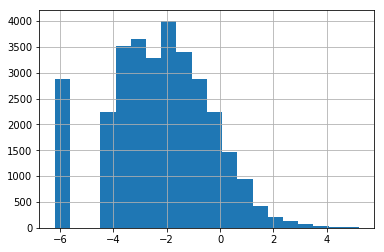

In [77]:
#0보다 큰 값만 log
np.log(merchant.loc[merchant.numerical_1 > 0,'numerical_1']).hist(bins = 20)

## numerical_1_log : 0보다 크게 만들어서 log

In [143]:
merchant['numerical_1_log'] = np.log(merchant.numerical_1 - np.array([merchant.numerical_1.min()-0.0000001]))

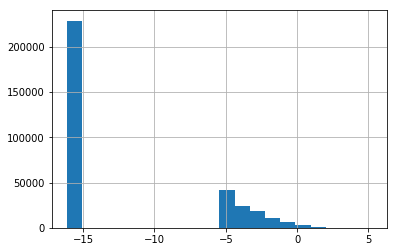

In [144]:
merchant['numerical_1_log'].hist(bins = 20)

## numerical_1_one_hot : 75%까지만 0로 나머지 1

In [147]:
merchant['numerical_1_one_hot'] = 0
merchant.loc[merchant.numerical_1 > -0.047556,'numerical_1_one_hot'] = 1

In [149]:
merchant.columns

Index(['merchant_id', 'merchant_group_id', 'merchant_category_id',
       'subsector_id', 'numerical_1', 'numerical_2', 'category_1',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
       'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',
       'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12',
       'category_4', 'city_id', 'state_id', 'category_2', 'numerical_1_log',
       'numerical_1_one_hot'],
      dtype='object')

## most_recent_sales_range, most_recent_purchases_range
- A등급인것만 1로
- A,B등급까지만 1로

In [156]:
merchant['sales_A'] = 0
merchant.loc[merchant.most_recent_sales_range == 'A', 'sales_A'] = 1
merchant['sales_AB'] = 0
merchant.loc[(merchant.most_recent_sales_range == 'A') | (merchant.most_recent_sales_range == 'B'), 'sales_AB'] = 1

merchant['purchase_A'] = 0
merchant.loc[merchant.most_recent_purchases_range == 'A', 'purchase_A'] = 1
merchant['purchase_AB'] = 0
merchant.loc[(merchant.most_recent_purchases_range == 'A') | (merchant.most_recent_purchases_range == 'B'), 'purchase_AB'] = 1

In [150]:
merchant.most_recent_sales_range.value_counts()

E    177104
D    117475
C     34075
B      5037
A      1005
Name: most_recent_sales_range, dtype: int64

In [151]:
merchant.most_recent_purchases_range.value_counts()

E    175309
D    119187
C     34144
B      5046
A      1010
Name: most_recent_purchases_range, dtype: int64

## avg_sales_lag12 : 의미 있나? 어차피  등급으로 있는데

In [162]:
#drop
merchant.drop(['avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3','avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6'],
             axis = 1, inplace=True)

In [164]:
merchant.loc[:, merchant.columns.str.endswith('lag12')].head()

,avg_sales_lag12,avg_purchases_lag12,active_months_lag12
0,-2.32,13.916667,12
1,-0.57,1.687500,12
2,-82.13,260.000000,2
3,NaN,3.833333,12
4,NaN,0.347222,12


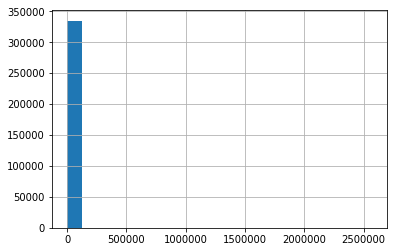

In [167]:
merchant['avg_sales_lag12'].hist(bins = 20)

In [168]:
merchant['avg_sales_lag12'].describe()

count    3.346830e+05
mean     2.522771e+01
std      5.251842e+03
min     -8.213000e+01
25%      8.500000e-01
50%      1.020000e+00
75%      1.290000e+00
max      2.567408e+06
Name: avg_sales_lag12, dtype: float64

In [170]:
transaction.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_00007093c1,244,N,2,C,705,M_ID_69423b34e4,-12,0.037176,2017-02-14 14:00:43,3.0,2,33
1,Y,C_ID_00007093c1,244,N,1,B,705,M_ID_a33355a1b7,-12,-0.467415,2017-02-14 15:47:45,3.0,2,33
2,Y,C_ID_00007093c1,244,N,1,B,307,M_ID_9400cf2342,-12,-0.572600,2017-02-16 15:37:58,3.0,2,19
3,Y,C_ID_00007093c1,244,N,3,C,705,M_ID_a33355a1b7,-12,-0.331575,2017-02-20 12:19:01,3.0,2,33
4,Y,C_ID_00007093c1,244,N,1,B,307,M_ID_9400cf2342,-11,-0.483944,2017-03-03 00:24:15,3.0,2,19


## transaction, merchant merge

In [173]:
#column 지정해서 다시 하자
trans_mer = pd.merge(transaction, merchant, on = ['merchant_id'])

In [174]:
trans_mer.head()

,authorized_flag,card_id,city_id_x,category_1_x,installments,category_3,merchant_category_id_x,merchant_id,month_lag,purchase_amount,purchase_date,category_2_x,state_id_x,subsector_id_x,merchant_group_id,merchant_category_id_y,subsector_id_y,numerical_1,category_1_y,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id_y,state_id_y,category_2_y,numerical_1_log,numerical_1_one_hot,sales_A,sales_AB,purchase_A,purchase_AB
0,Y,C_ID_00007093c1,244,N,2,C,705,M_ID_69423b34e4,-12,0.037176,2017-02-14 14:00:43,3.0,2,33,35,705,33,15.855951,N,A,A,1.15,1.08779,12,N,-1,2,3.0,2.767163,1,1,1,1,1
1,Y,C_ID_00007093c1,244,N,1,B,705,M_ID_69423b34e4,-11,-0.401298,2017-03-08 15:05:29,3.0,2,33,35,705,33,15.855951,N,A,A,1.15,1.08779,12,N,-1,2,3.0,2.767163,1,1,1,1,1
2,Y,C_ID_00007093c1,244,N,1,B,705,M_ID_69423b34e4,-11,-0.566590,2017-03-11 15:04:31,3.0,2,33,35,705,33,15.855951,N,A,A,1.15,1.08779,12,N,-1,2,3.0,2.767163,1,1,1,1,1
3,Y,C_ID_00007093c1,244,N,1,B,705,M_ID_69423b34e4,-11,-0.677936,2017-03-11 15:10:15,3.0,2,33,35,705,33,15.855951,N,A,A,1.15,1.08779,12,N,-1,2,3.0,2.767163,1,1,1,1,1
4,Y,C_ID_00007093c1,244,N,1,B,705,M_ID_69423b34e4,-11,-0.566590,2017-03-11 15:26:58,3.0,2,33,35,705,33,15.855951,N,A,A,1.15,1.08779,12,N,-1,2,3.0,2.767163,1,1,1,1,1


In [178]:
train = pd.read_csv(path + 'train2.csv')
test = pd.read_csv(path + 'test2.csv')
